Check if you have the packages installed:

In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(DESeq2)
library(DiffBind)
library(tidyr)
library(wesanderson)
library(viridis)
library(gplots)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter,

In [2]:
setwd('/ddn1/vol1/staging/leuven/stg_00041/Irene/ATAC_analysis/nonAllelic_ATAC/')

In [3]:
getwd()

[1] "/ddn1/vol1/staging/leuven/stg_00041/Irene/ATAC_analysis/nonAllelic_ATAC"

In [4]:
load("nonAllelic_ATAC.RData", verbose=TRUE)


Loading objects:
  conflicting
  state_annot_merged
  pluripotency_plot_df
  Avg_accessibility_perChr
  aq2
  .Random.seed
  ratios_X_8_2
  countsNigro
  ATAC_matrix_raw_short
  chrX_iPSCs_open
  colData
  all_promoters_ind_d
  dds_unbiased
  counts_norm_log_chr
  chrX_allelic_dynamics_all_overlap
  tested_int_annot_test
  f1
  f2
  rld
  promoter_enhancer_groups_complete_clean_rbind
  glm_results_significance
  chr
  dp.model.all.prom
  counts_norm
  tested_int
  days
  testy
  ratios
  ratios_auto
  dp.model
  chrX_allelic_dynamics_all_overlap_Clean_merge
  promoter_enhancer_groups_complete_clean_1
  counts_norm_log
  all_promoters_10kb
  promoter_enhancer_groups_complete_clean_2
  values
  p1
  df
  esrrb
  prdm14
  vector
  time.est
  values2
  pecam1
  promoter_enhancer_groups_filt
  chr1
  all_enhancers_ind_long_d
  chr2
  Avg_accessibility_allChr_long
  chr3
  test
  time_est_all.enh
  chr4
  df_autosomes
  chr5
  glm_time.est
  chrX_allelic_dynamics_all_overlap_Clean
  promoter

In [5]:
head(counts_norm_log)

chr,Day0,Day8,Day9,Day10,Day12,iPSCs
chr1,1.588821,6.702779,6.233496,5.874194,5.375180,4.003392
chr1,1.588821,1.893349,2.192005,2.706775,4.026936,5.361081
chr1,6.309491,5.030098,5.252544,4.199721,4.554727,2.861100
chr1,3.705779,3.772925,3.933347,4.954775,6.656925,8.677801
chr1,7.389453,3.192968,4.062240,2.520751,2.868021,4.558053
chr1,9.222520,4.860698,5.140217,4.260434,4.104473,5.173442


In [6]:
class(counts_norm_log)

[1] "data.frame"

Make a df with chrX observations

In [9]:
nrow(chrX_df_counts)

[1] 5357

In [10]:
sum(chrX_df_counts$Day0)
sum(chrX_df_counts$Day8)
sum(chrX_df_counts$Day9)
sum(chrX_df_counts$Day10)
sum(chrX_df_counts$Day12)
sum(chrX_df_counts$iPSCs)

[1] 27109.76

[1] 27238.65

[1] 27417.26

[1] 27418.16

[1] 29744.57

[1] 32841.84

In [12]:
chrX_matrix_counts <- as.matrix(chrX_df_counts[,-1])

In [13]:
head(chrX_matrix_counts)

,Day0,Day8,Day9,Day10,Day12,iPSCs
218232,1.588821,4.6164585,4.659464,5.572837,6.098174,6.697070
218233,2.326557,3.0426289,2.892376,3.153483,4.711634,5.842758
218234,1.588821,0.9297826,2.401435,2.706775,4.104473,5.173442
218235,3.464690,4.5622256,4.439792,5.191446,6.815206,8.290164
218236,1.588821,5.4137800,4.738751,4.954775,4.314834,1.809940
218237,3.175067,6.4868578,5.651274,5.874194,3.858116,3.090655


In [12]:
class(chrX_matrix_counts)

[1] "matrix"

In [13]:
NROW(chrX_matrix_counts)

[1] 5357

First way: 'manual way'with kmeans function integrated in R

In [24]:
kmeans_test <- kmeans(chrX_matrix_counts, centers = 5)

Add a column to the matrix with the number of cluster to which each region belongs

In [25]:
chrX_matrix_counts2 <- cbind(chrX_matrix_counts, kmeans_test$cluster)

In [26]:
order_clustered <- order(chrX_matrix_counts2[,7])

In [27]:
chrX_matrix_counts2 <- chrX_matrix_counts2[order_clustered,]

In [28]:
head(chrX_matrix_counts2)

,Day0,Day8,Day9,Day10,Day12,iPSCs,
218235,3.464690,4.562226,4.439792,5.191446,6.815206,8.290164,1
218249,4.092907,4.815046,4.289900,5.311076,6.756366,8.529129,1
218250,5.888329,6.651752,6.506985,6.717728,7.848767,9.109520,1
218256,7.263134,5.502854,5.279310,5.252501,6.098174,6.387279,1
218259,6.544880,5.966690,6.892273,5.931326,6.259415,5.173442,1
218265,2.326557,5.030098,5.750262,5.548697,6.419682,7.707504,1


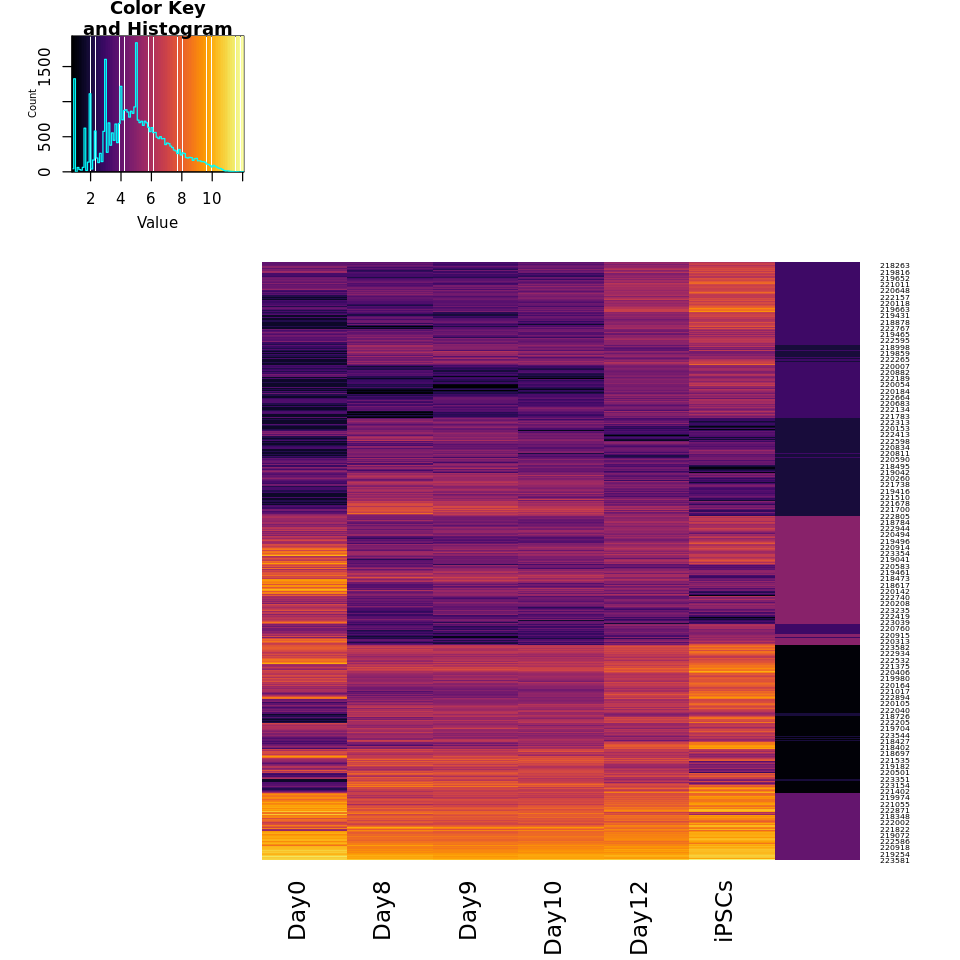

In [29]:
heatmap.2(chrX_matrix_counts2, col= inferno (100), trace = "none", Rowv = TRUE, Colv = FALSE, dendrogram="none")

In [30]:
options(repr.plot.width=8, repr.plot.height=8)
pdf(file="Xchr_5kmeans_heatmap_inferno.pdf")
heatmap.2(chrX_matrix_counts2, col= inferno (100), trace = "none", Rowv = TRUE, Colv = FALSE, dendrogram="none")
dev.off()

png 
  2

Way 2 of doing kmeans cluster: with pheatmap function

In [14]:
library(pheatmap)

In [30]:
options(repr.plot.width=6, repr.plot.height=3)

In [41]:
pheatmap(chrX_matrix_counts, 
         kmeans_k = 10, 
         color = inferno(10),
         cluster_cols = FALSE, 
         cluster_rows = TRUE, 
         cellheight = 10, 
         cellwidth = 20, 
         border_color = NA, 
         fontsize_row = 6,
         main = "ATAC dynamics Xchr",
         filename = "pHeatmap_Xchr_NONallelic.pdf")

In [58]:
anno <- chrX_matrix_counts2[,8]

In [59]:
?pheatmap

pheatmap {pheatmap},R Documentation
mat,numeric matrix of the values to be plotted.
color,vector of colors used in heatmap.
kmeans_k,"the number of kmeans clusters to make, if we want to aggregate the rows before drawing heatmap. If NA then the rows are not aggregated."
breaks,"a sequence of numbers that covers the range of values in mat and is one element longer than color vector. Used for mapping values to colors. Useful, if needed to map certain values to certain colors, to certain values. If value is NA then the breaks are calculated automatically. When breaks do not cover the range of values, then any value larger than max(breaks) will have the largest color and any value lower than min(breaks) will get the lowest color."
border_color,"color of cell borders on heatmap, use NA if no border should be drawn."
cellwidth,"individual cell width in points. If left as NA, then the values depend on the size of plotting window."
cellheight,"individual cell height in points. If left as NA, then the values depend on the size of plotting window."
scale,"character indicating if the values should be centered and scaled in either the row direction or the column direction, or none. Corresponding values are ""row"", ""column"" and ""none"""
cluster_rows,"boolean values determining if rows should be clustered or hclust object,"
cluster_cols,boolean values determining if columns should be clustered or hclust object.


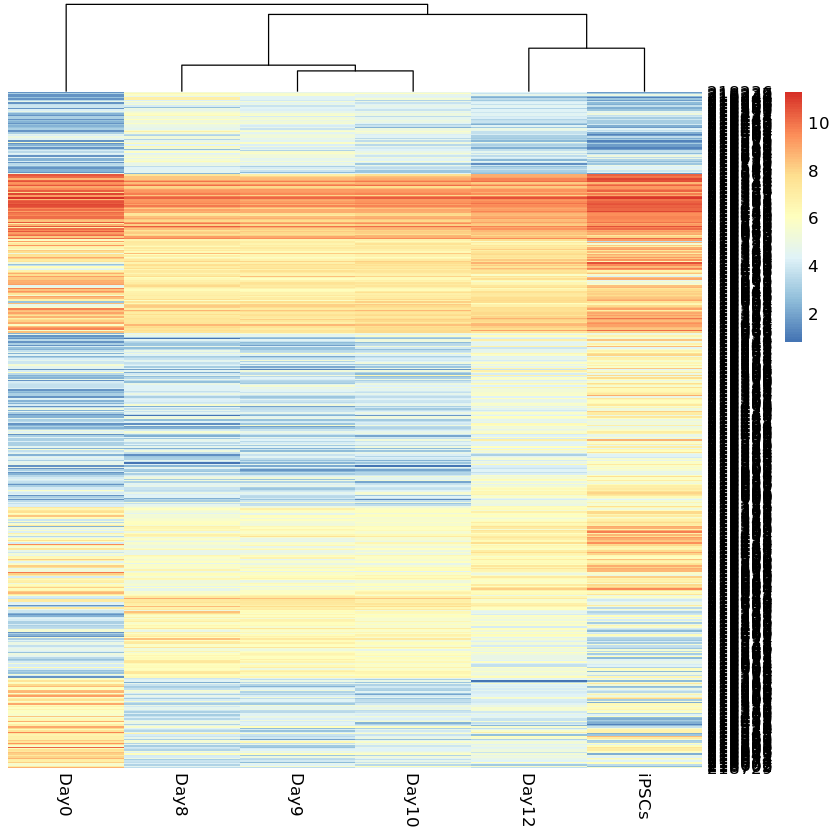

In [85]:
pheatmap(chrX_matrix_counts2[,1:6], cluster_rows=FALSE, Colv= F)

In [76]:
library(pheatmap)
plot_kmeans_heatmap <- function (dat=NULL, k=3, nstart=20) {
  # Data wrangling ----------------------------------------------------------
  set.seed(1)
  dat_m         <- kmeans(dat, k, nstart = nstart)
  m.kmeans      <- cbind(dat, dat_m$cluster)
  clusterid_col <- dim(m.kmeans)[2]
  # Ordering matrix ----------------------------------------------------------------
  # order the data row index according the last column (i.e. cluster ID)
  ordered_idx   <- order(m.kmeans[,clusterid_col])
  # order the matrix according to the order of the last column
  m.kmeans<- m.kmeans[ordered_idx,]
  # Plot it -----------------------------------------------------------------
  # Annotate row with class 
   annot_row <- as.data.frame(m.kmeans) %>% 
               transmute(gene_class=as.factor(dat_m$cluster), rn=row.names(.))
  rownames(annot_row) <- annot_row$rn
  annot_row$rn <- NULL
  pheatmap(m.kmeans[,1:clusterid_col-1], 
           scale="row",
           cluster_rows=F, 
           cluster_cols=F,
           legend=T, 
           annotation_row = annot_row,
           border_color = F,
           show_rownames=F,
           show_colnames=T)
}

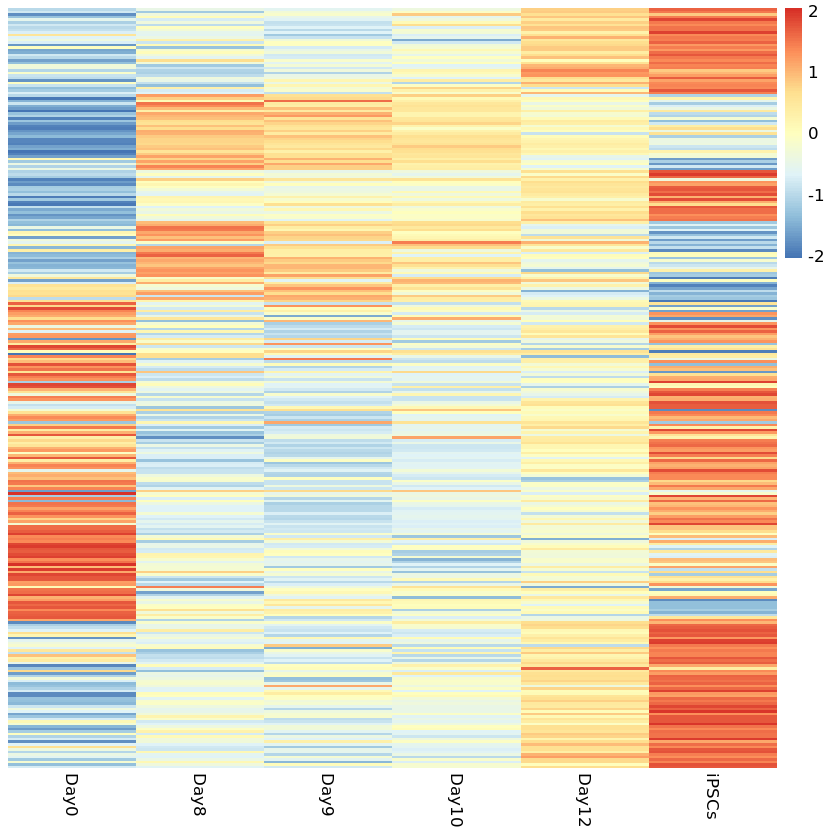

In [83]:
  set.seed(1)
  dat_m         <- kmeans(chrX_matrix_counts[1:300,], 10)
  m.kmeans      <- cbind(chrX_matrix_counts[1:300,], dat_m$cluster)
  clusterid_col <- dim(m.kmeans)[2]
  # Ordering matrix ----------------------------------------------------------------
  # order the data row index according the last column (i.e. cluster ID)
  ordered_idx   <- order(m.kmeans[,7])
  # order the matrix according to the order of the last column
  m.kmeans<- m.kmeans[ordered_idx,]
  # Plot it -----------------------------------------------------------------
  # Annotate row with class 
  # annot_row <- as.data.frame(m.kmeans) %>% 
             #  transmute(gene_class=as.factor(dat_m$cluster), rn=row.names(.))
 # rownames(annot_row) <- annot_row$rn
 # annot_row$rn <- NULL
  pheatmap(m.kmeans[,1:clusterid_col-1], 
           scale="row",
           cluster_rows=F, 
           cluster_cols=F,
           legend=T, 
          # annotation_row = annot_row,
           border_color = F,
           show_rownames=F,
           show_colnames=T)

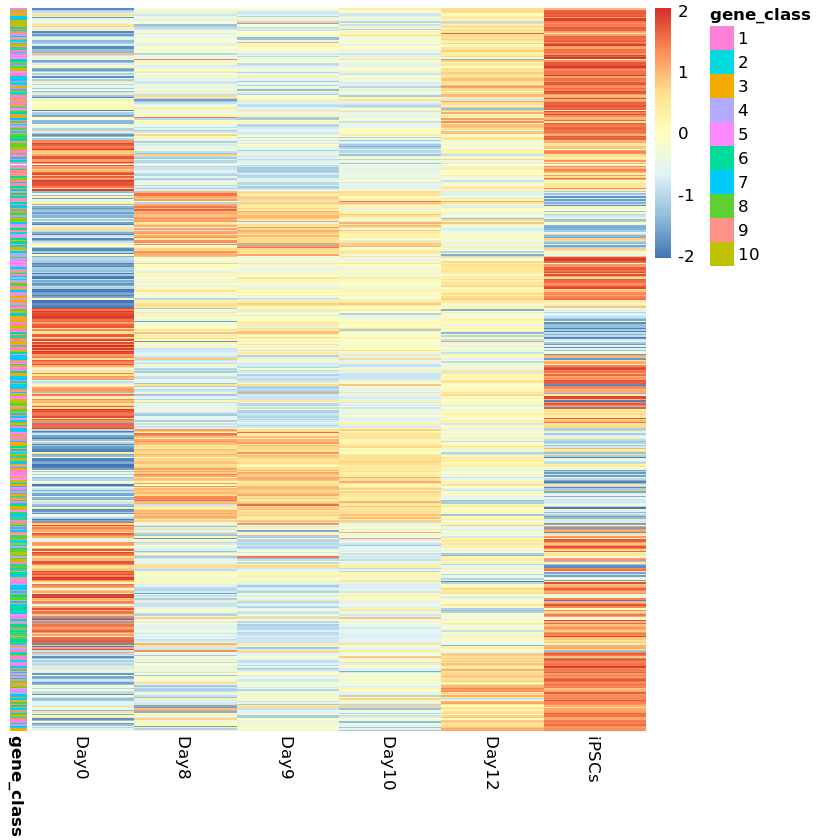

In [79]:
plot_kmeans_heatmap(chrX_matrix_counts[1:500,], k=10)